<a href="https://colab.research.google.com/github/ayushsyntax/ML_Journey/blob/main/F_E(ColumnTransformer).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [12]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [3]:
df = pd.read_csv('covid_toy.csv')

In [4]:
df.head()

,age,gender,fever,cough,city,has_covid
0,60,Male,103.0,Mild,Kolkata,No
1,27,Male,100.0,Mild,Delhi,Yes
2,42,Male,101.0,Mild,Delhi,No
3,31,Female,98.0,Mild,Kolkata,No
4,65,Female,101.0,Mild,Mumbai,No


In [6]:
df.isnull().sum()

,0
age,0
gender,0
fever,10
cough,0
city,0
has_covid,0


In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.drop(columns=['has_covid']),df['has_covid'],
                                                test_size=0.2)

In [8]:
X_train

,age,gender,fever,cough,city
1,27,Male,100.0,Mild,Delhi
14,51,Male,104.0,Mild,Bangalore
84,69,Female,98.0,Strong,Mumbai
67,65,Male,99.0,Mild,Bangalore
3,31,Female,98.0,Mild,Kolkata
...,...,...,...,...,...
7,20,Female,NaN,Strong,Mumbai
43,22,Female,99.0,Mild,Bangalore
58,23,Male,98.0,Strong,Mumbai
62,56,Female,104.0,Strong,Bangalore


##1.Normal Way

In [13]:
si = SimpleImputer()
X_train_fever = si.fit_transform(X_train[['fever']])

# also the test data
X_test_fever = si.fit_transform(X_test[['fever']])

X_train_fever.shape

(80, 1)

In [14]:
# Ordinalencoding -> cough
oe = OrdinalEncoder(categories=[['Mild','Strong']])
X_train_cough = oe.fit_transform(X_train[['cough']])

# also the test data
X_test_cough = oe.fit_transform(X_test[['cough']])

X_train_cough.shape

(80, 1)

In [17]:
# OneHotEncoding -> gender,city
ohe = OneHotEncoder(drop='first')
X_train_gender_city = ohe.fit_transform(X_train[['gender','city']])

# also the test data
X_test_gender_city = ohe.fit_transform(X_test[['gender','city']])

X_train_gender_city.shape

(80, 4)

In [20]:
# Extracting Age
X_train_age = X_train.drop(columns=['gender','fever','cough','city']).values

# also the test data
X_test_age = X_test.drop(columns=['gender','fever','cough','city']).values

X_train_age.shape


(80, 1)

In [ ]:
X_train_transformed = np.concatenate((X_train_age,X_train_fever,X_train_gender_city,X_train_cough),axis=1)
# also the test data
X_test_transformed = np.concatenate((X_test_age,X_test_fever,X_test_gender_city,X_test_cough),axis=1)

X_train_transformed.shape

##2.With Column Transformer

In [23]:
from sklearn.compose import ColumnTransformer

In [25]:
transformer = ColumnTransformer(transformers=[
    ('tnf1',SimpleImputer(),['fever']),
    ('tnf2',OrdinalEncoder(categories=[['Mild','Strong']]),['cough']),
    ('tnf3',OneHotEncoder(drop='first'),['gender','city'])
],remainder='passthrough')


In [26]:
transformer.fit_transform(X_train).shape

(80, 7)

In [27]:
transformer.fit_transform(X_test).shape

(20, 7)

#Using ColumnTransfomer

In [28]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Separate features and target
X = df.drop(columns=['has_covid'])
y = df['has_covid']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define preprocessing for numerical columns
numerical_features = ['age', 'fever']
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Fill missing values with mean
    ('scaler', StandardScaler())                 # Scale the data
])

# Define preprocessing for categorical columns
categorical_features = ['gender', 'cough', 'city']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Fill missing values with most frequent value
    ('onehot', OneHotEncoder(handle_unknown='ignore'))      # One-hot encode categorical features
])

# Combine preprocessing steps using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Apply the preprocessor to the training and testing data
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

# Check the shape of the transformed data
print("X_train_transformed shape:", X_train_transformed.shape)
print("X_test_transformed shape:", X_test_transformed.shape)

X_train_transformed shape: (80, 10)
X_test_transformed shape: (20, 10)


In [29]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Separate features and target
X = df.drop(columns=['has_covid'])
y = df['has_covid']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocess numerical columns
numerical_features = ['age', 'fever']
numerical_imputer = SimpleImputer(strategy='mean')  # Fill missing values with mean
numerical_scaler = StandardScaler()                # Scale the data

# Fit and transform numerical columns
X_train_numerical = numerical_imputer.fit_transform(X_train[numerical_features])
X_train_numerical = numerical_scaler.fit_transform(X_train_numerical)

X_test_numerical = numerical_imputer.transform(X_test[numerical_features])
X_test_numerical = numerical_scaler.transform(X_test_numerical)

# Preprocess categorical columns
categorical_features = ['gender', 'cough', 'city']
categorical_imputer = SimpleImputer(strategy='most_frequent')  # Fill missing values with most frequent value
categorical_encoder = OneHotEncoder(handle_unknown='ignore')   # One-hot encode categorical features

# Fit and transform categorical columns
X_train_categorical = categorical_imputer.fit_transform(X_train[categorical_features])
X_train_categorical = categorical_encoder.fit_transform(X_train_categorical)

X_test_categorical = categorical_imputer.transform(X_test[categorical_features])
X_test_categorical = categorical_encoder.transform(X_test_categorical)

# Combine numerical and categorical features
import scipy.sparse as sp
X_train_transformed = sp.hstack([X_train_numerical, X_train_categorical])
X_test_transformed = sp.hstack([X_test_numerical, X_test_categorical])

# Check the shape of the transformed data
print("X_train_transformed shape:", X_train_transformed.shape)
print("X_test_transformed shape:", X_test_transformed.shape)

X_train_transformed shape: (80, 10)
X_test_transformed shape: (20, 10)


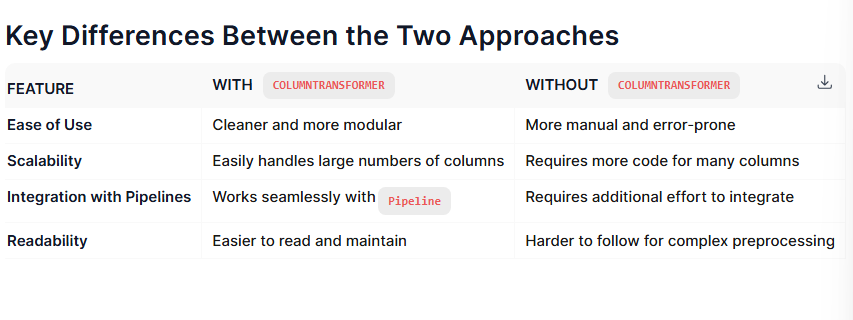